**Problem Statement:**<br>
Imagine you have a dataset where you need to predict the Genres of Music using
an Unsupervised algorithm and you need to find the accuracy of the model, built-in
docker, and use some library to display that in frontend
[Dataset](https://www.kaggle.com/datasets/insiyeah/musicfeatures) This is the Dataset You can use this dataset for this question.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [20]:
df =pd.read_csv('../data/data.csv')

In [21]:
df

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


In [22]:
df.columns

Index(['filename', 'tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
       'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
       'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19',
       'mfcc20', 'label'],
      dtype='object')

In [23]:
df.label.value_counts()

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

Here, total categories of music genre are available.

# EDA

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tempo,1000.0,119.601702,28.297367,54.978391,99.384014,117.453835,135.999178,234.907670
beats,1000.0,57.138000,14.225728,18.000000,47.000000,56.000000,65.250000,117.000000
chroma_stft,1000.0,0.378656,0.081689,0.171782,0.319641,0.383075,0.435974,0.663573
rmse,1000.0,0.130929,0.065685,0.005276,0.086625,0.122448,0.175793,0.398012
spectral_centroid,1000.0,2201.834226,715.961347,569.930721,1627.793931,2209.468780,2691.969702,4434.439444
spectral_bandwidth,1000.0,2242.559613,526.337663,897.994319,1907.136505,2221.408983,2578.474352,3509.578677
rolloff,1000.0,4571.702159,1574.770035,749.062137,3380.956639,4658.671830,5534.197785,8676.405868
zero_crossing_rate,1000.0,0.103637,0.041834,0.021701,0.070281,0.099539,0.132007,0.274829
mfcc1,1000.0,-144.479173,100.235661,-552.064063,-200.695133,-120.206072,-73.895019,42.034587
mfcc2,1000.0,99.552199,31.331904,-1.527148,76.811480,98.452551,119.893638,193.096518


<Axes: >

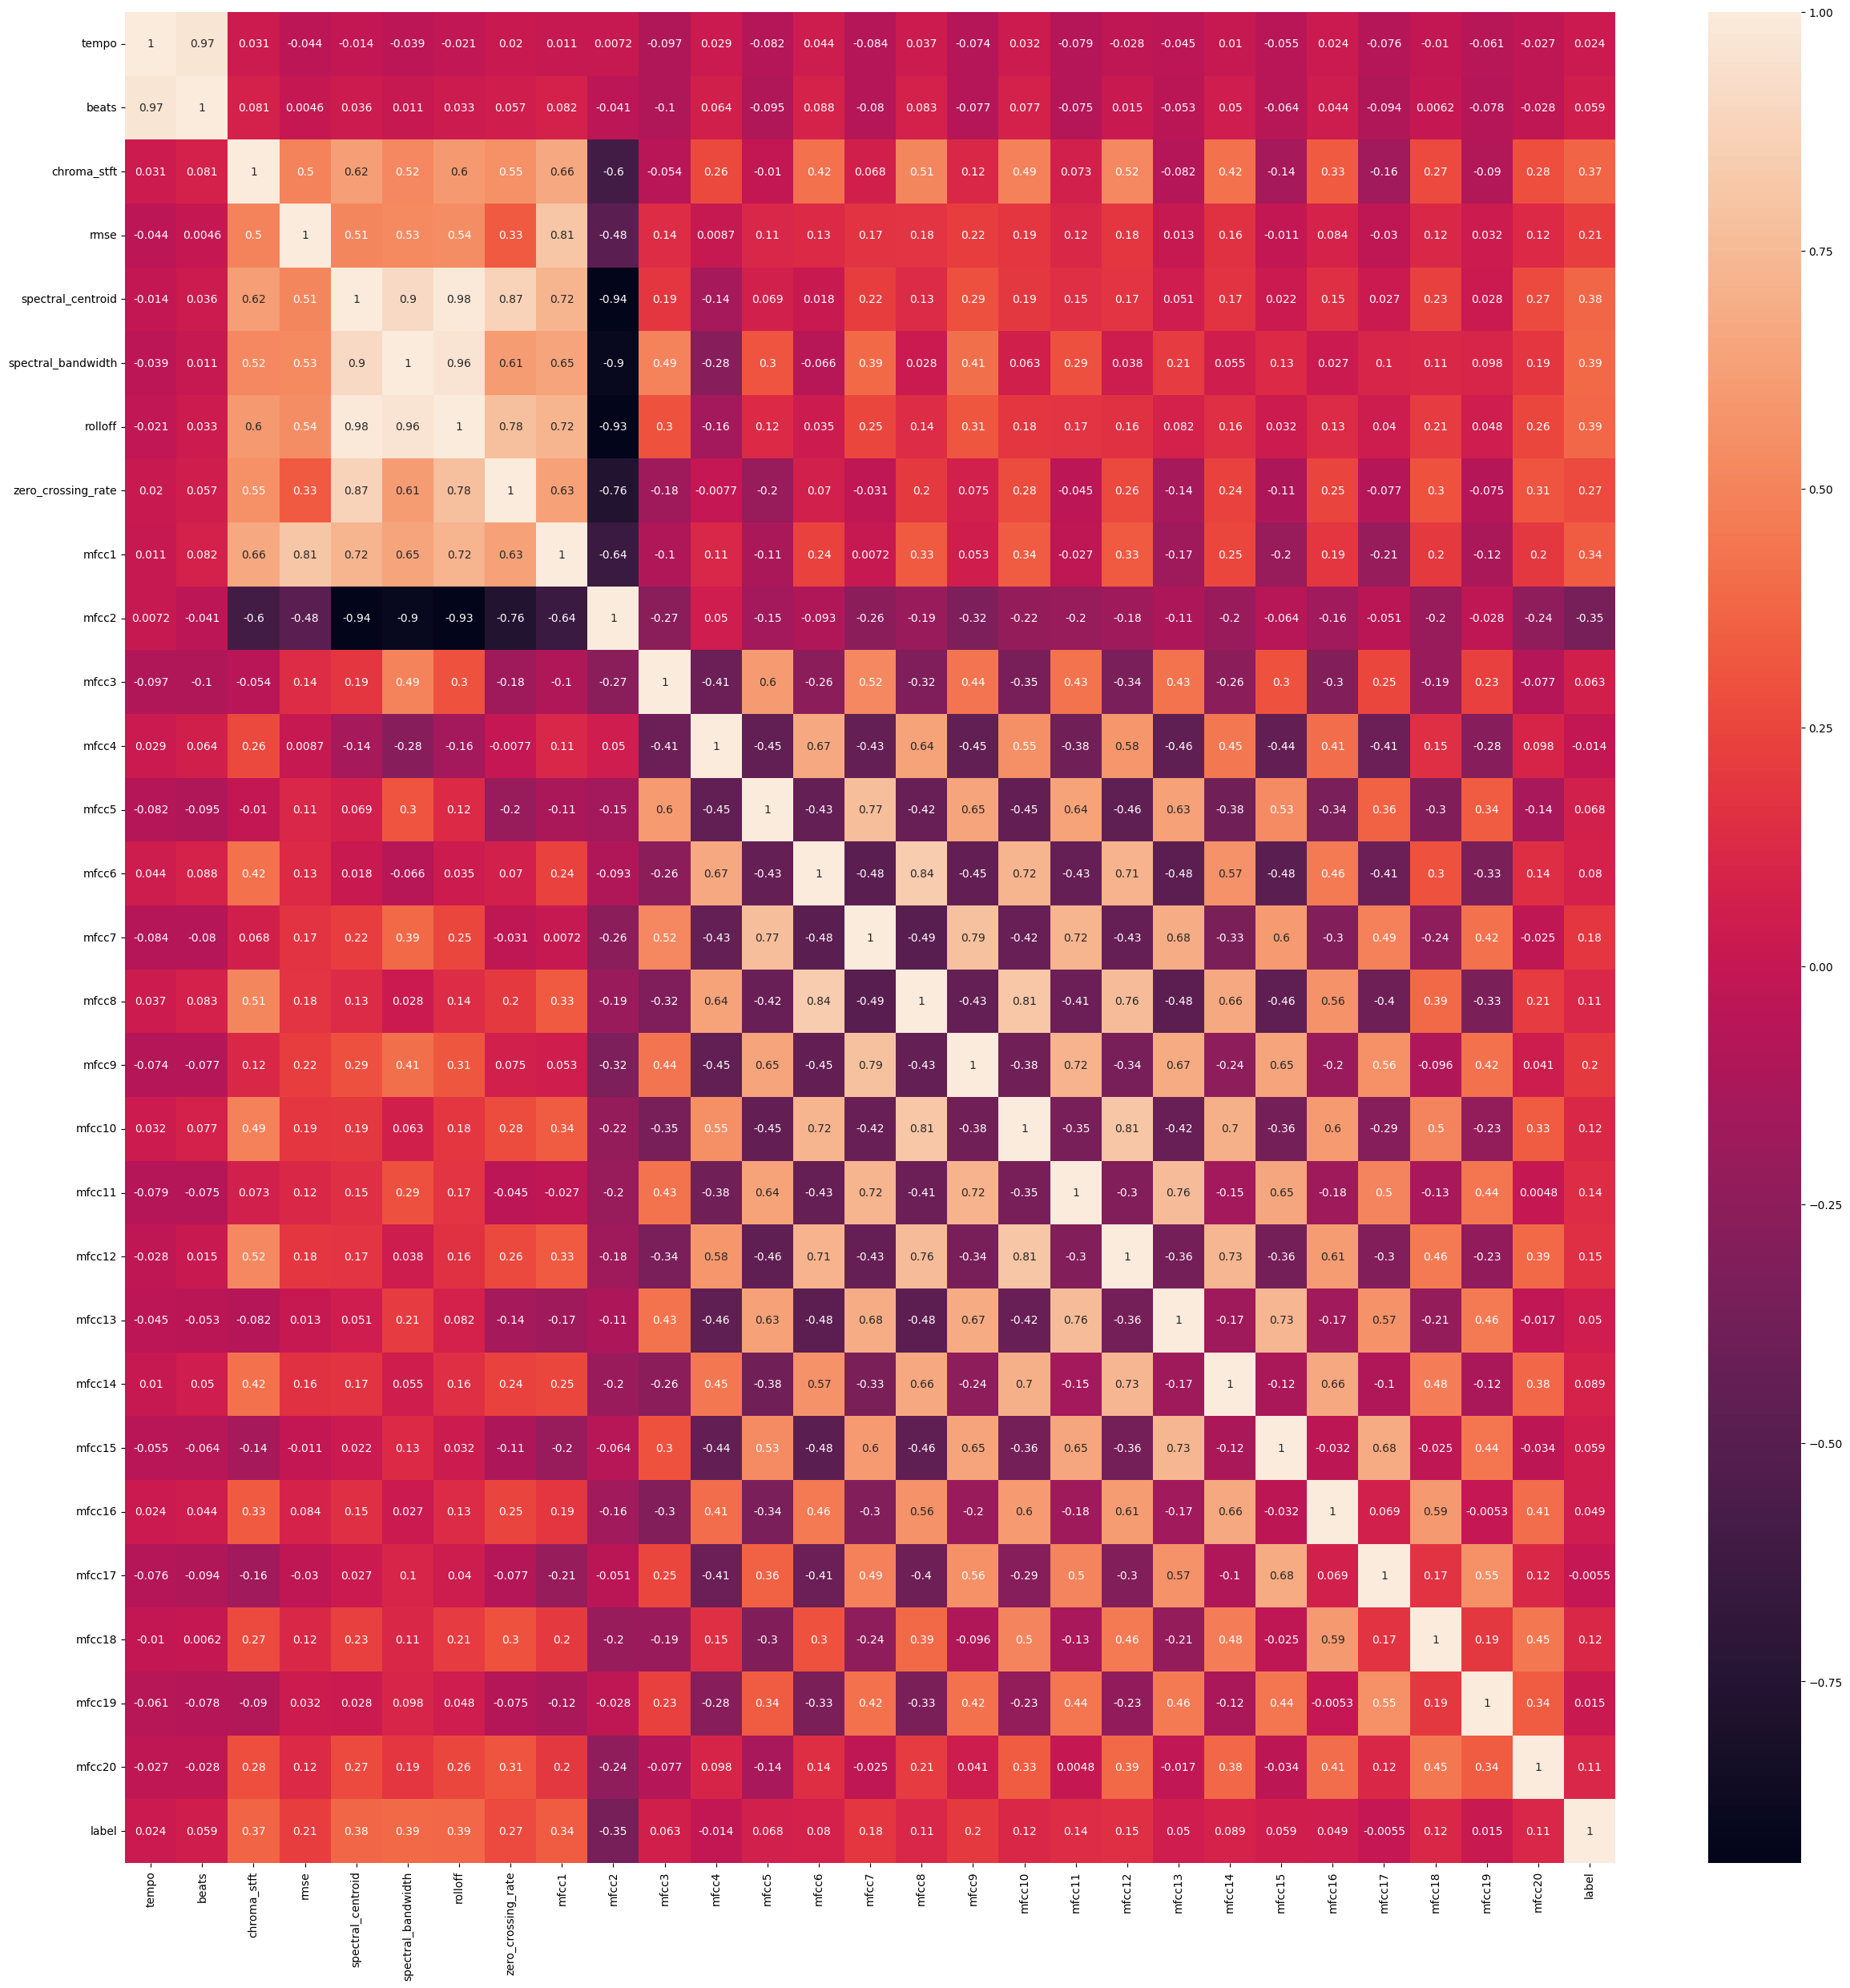

In [38]:
from sklearn.preprocessing import LabelEncoder
df1 = df.drop('filename',axis=1)

le = LabelEncoder()
le.fit(df1['label'])
embedded_labels=le.transform(df1.label)
# embedded_labels
df1['label'] = embedded_labels

fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df1.corr(),annot=True)

In [83]:
df.isna().sum()

filename              0
tempo                 0
beats                 0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
dtype: int64

In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [54]:
# find the unique vale in filename feature 
unq = df['filename'].unique()
print(len(unq))

1000


In the dataset there are tootal 1000 rows and filename feature has also 1000 unique values so we can say that filename is uniuue for each row.

In [56]:
df1.columns

Index(['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'label'],
      dtype='object')

# Model building

In [7]:
# To find the optimal no of cluster_centers

def optimise_kmeans(data,max_x=20):
    means = []
    inertias = []

    for k in range(1,max_x):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)


    #generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel("No of cluster")
    plt.ylabel("inertia")
    plt.grid(True)
    plt.show()
    


### implementing with only highly corelated data 

In [135]:
# dropping the comperatively less (<0.2) corelated data from heatmap and storing to new data frame also removing the label column
df2 = df.drop(['filename','mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19','mfcc20','label'],axis=1)

In [137]:
df2.columns

Index(['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1',
       'k_label'],
      dtype='object')

#### standardize the data

In [140]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
colm = ['tempo', 'beats', 'chroma_stft', 'rmse',
       'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc1', 'k_label']
df2[colm]=ssc.fit_transform(df2[colm])
df2

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,k_label
0,-0.574274,-0.502018,0.019652,1.787196,-0.118629,-0.543552,-0.238627,0.565253,1.173317,-0.542438
1,-0.844974,-0.924000,-0.884337,-0.265843,-1.461374,-1.415943,-1.525842,-1.076777,-0.892161,0.436692
2,1.145463,1.256241,-1.533017,0.314416,-1.216820,-0.511175,-1.061974,-1.450966,-0.771802,-1.521568
3,2.297073,2.381526,-1.339101,-0.180601,-1.174937,-1.282623,-1.163976,-0.825410,-0.626127,-1.521568
4,1.481349,1.185910,0.151907,0.103572,-0.546054,-0.361597,-0.409085,-0.673412,-0.009536,-1.521568
...,...,...,...,...,...,...,...,...,...,...
995,0.121810,0.130955,0.491814,0.535047,0.153990,-0.345453,-0.027640,0.883693,1.028863,-0.542438
996,-0.075941,-0.080036,-0.525193,-0.567427,0.491924,-0.044611,0.350735,0.778124,0.230257,-0.542438
997,-0.574274,-0.853670,-0.071300,1.185246,-1.196170,-0.761891,-1.037138,-1.495642,0.165017,0.436692
998,-0.256497,-0.853670,-0.418667,0.749926,-0.735546,-1.119873,-0.837454,-0.390854,0.460374,-0.542438


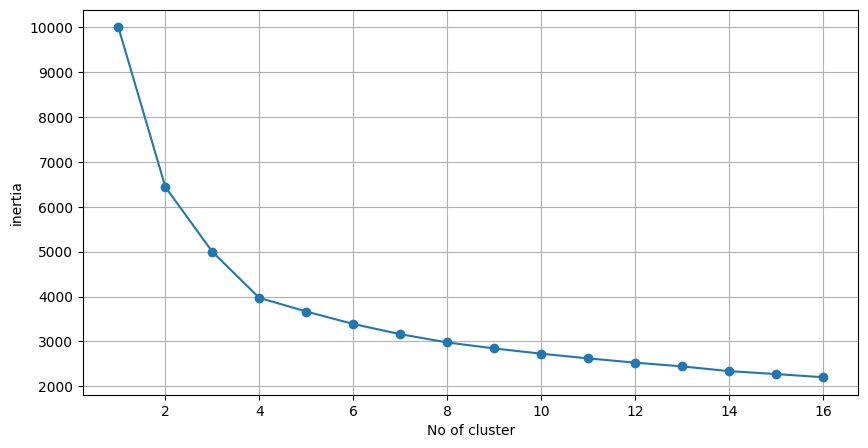

In [141]:
optimise_kmeans(data=df2,max_x=17)

In [158]:
# Perform evaluation (optional)
silhouette_avg = silhouette_score(df2, kmeans.labels_)
silhouette_avg

0.34682429591549174

### Implementing with all data

In [149]:
# checking with all data 
df1 = df.drop(['filename'],axis=1)


In [148]:
df1

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,k_label
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues,1
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues,2
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues,0
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues,0
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,105.403012,...,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock,1
996,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,89.522283,...,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock,1
997,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,134.443879,...,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock,2
998,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,136.611573,...,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock,1


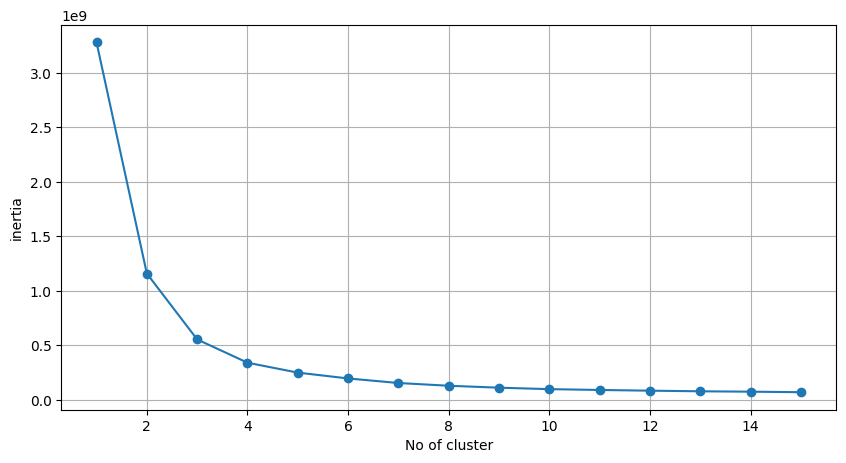

In [104]:
# printing the elbow plot
optimise_kmeans(df1,16)

As we can obserbe here that the not much difference in elbow graph in corleate data and all data cases. And as per the graph mainly 4 cluster can be created.

## applying k means

### with 4 Clusters

In [160]:
kmeans = KMeans(n_clusters=4)

In [161]:
kmeans.fit(df2)


KMeans(n_clusters=4)

In [162]:
df2['k_label']=kmeans.labels_

In [163]:
# Perform evaluation (optional)
silhouette_avg = silhouette_score(df2, kmeans.labels_)
silhouette_avg

0.34682429591549174

### Another visualization

In [153]:
# preparing centroids for elbow graph
wc=[]
for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit_predict(df2)
    wc.append(km.inertia_)


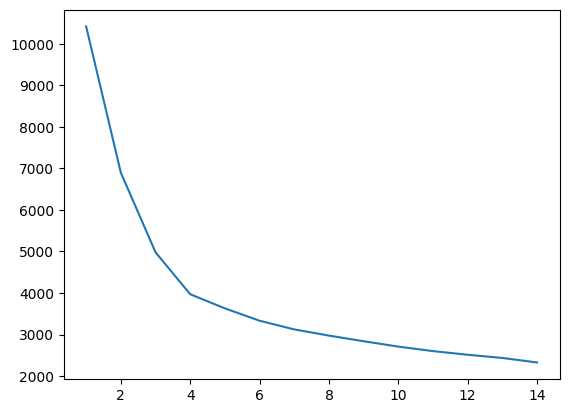

In [155]:
#plotting elbow graph
plt.plot(range(1,15),wc)


# Final Code

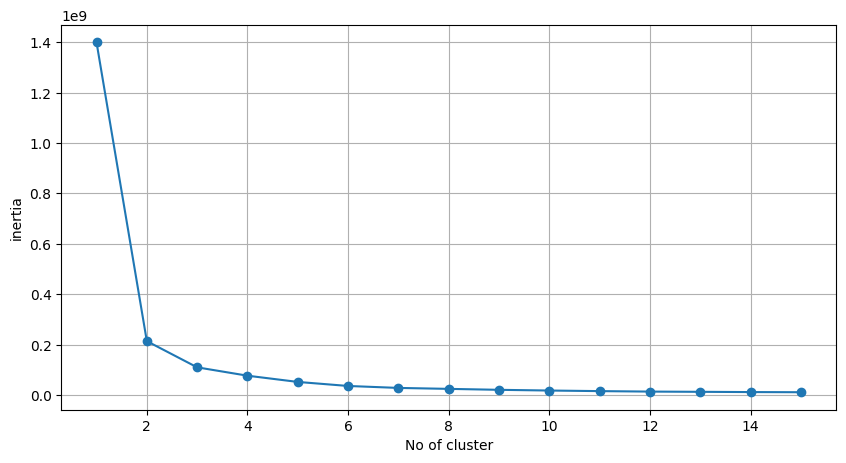

Training Accuracy: 0.98125
Testing Accuracy: 0.975


In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('../data/data_2genre.csv')



# Split the data into features and labels
X = data.drop(['label','filename'], axis=1)
y = data['label']

# printing the elbow plot
optimise_kmeans(X,16)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the K-Means clustering algorithm
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train_scaled)

# Predict the clusters for the training and testing data
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)

# Map the predicted clusters to genre labels based on majority voting
cluster_labels = {}
for cluster in range(10):
    cluster_labels[cluster] = y_train[train_clusters == cluster].mode()[0]

predicted_train_labels = [cluster_labels[cluster] for cluster in train_clusters]
predicted_test_labels = [cluster_labels[cluster] for cluster in test_clusters]

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, predicted_train_labels)
test_accuracy = accuracy_score(y_test, predicted_test_labels)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
